
# 1. Vilas e Favelas de Belo Horizonte | Introdução a Banco de Dados - TP2



# 2. Membros

1. Fernando Vilela Brandão - 2021421907
2. Gabriel de Paula Silva - 2019006612
3. Juliana Espíndola Botelho - 2019041558





# 3. Descrição dos dados (qual a URL? qual o domínio? como os dados foram processados?)

Os dados foram extraídos do [Portal Brasileiro de Dados Abertos](https://dados.gov.br/), especificamente, da Prefeitura de Belo Horizonte. A URL é https://dados.gov.br/dataset/vilas-e-favelas e o domínio é **.gov**. A partir de um único csv (disponível no site citado) foram divididas manualmente 9 tabelas, sendo 8 entidades e 1 de relação. Para incrementar o nível de análise, foram incluídas junto ao dataset original as regionais de cada vila/favela, através do site [IDE BHGEO](http://bhmap.pbh.gov.br/v2/mapa/idebhgeo). Com essa adição, foi criada uma legenda para cada uma das 9 regionais. Os dados foram divididos e normalizados e depois baixados em csv, tendo sido disponibilizados em um repositório no GitHub. A importação e a preparação dos arquivos para que possam ser lidos em SQL segue abaixo, bem como os esquemas que representam as entidades e relacionamentos com seus atributos respectivos.

Importação das bibliotecas.


In [ ]:
import pandas as pd
import io
import sqlite3

Importação dos arquivos csv.

In [ ]:
url = 'https://raw.githubusercontent.com/Fernandovilelab/Ibd-Tp2/main/Favelas%20e%20vilas-%20Belo%20Horizonte%20-%20Domicilios.csv'
Domicilios = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/Fernandovilelab/Ibd-Tp2/main/Favelas%20e%20vilas-%20Belo%20Horizonte%20-%20Estabelecimentos.csv'
Estabelecimentos=pd.read_csv(url)

url='https://raw.githubusercontent.com/Fernandovilelab/Ibd-Tp2/main/Favelas%20e%20vilas-%20Belo%20Horizonte%20-%20Favelas%20(1).csv'
Favelas=pd.read_csv(url)

url='https://raw.githubusercontent.com/Fernandovilelab/Ibd-Tp2/main/Favelas%20e%20vilas-%20Belo%20Horizonte%20-%20InstituicaoTipoPesquisa.csv'
InstituicaoTipoPesquisa=pd.read_csv(url)

url='https://raw.githubusercontent.com/Fernandovilelab/Ibd-Tp2/main/Favelas%20e%20vilas-%20Belo%20Horizonte%20-%20Institui%C3%A7%C3%B5es.csv'
Instituições=pd.read_csv(url)

url='https://raw.githubusercontent.com/Fernandovilelab/Ibd-Tp2/main/Favelas%20e%20vilas-%20Belo%20Horizonte%20-%20Pesquisas.csv'
Pesquisas=pd.read_csv(url)

url ='https://raw.githubusercontent.com/Fernandovilelab/Ibd-Tp2/main/Favelas%20e%20vilas-%20Belo%20Horizonte%20-%20Popula%C3%A7%C3%B5es.csv'
Populações=pd.read_csv(url)

url='https://raw.githubusercontent.com/Fernandovilelab/Ibd-Tp2/main/Favelas%20e%20vilas-%20Belo%20Horizonte%20-%20Regionais.csv'
Regionais=pd.read_csv(url)

url='https://raw.githubusercontent.com/Fernandovilelab/Ibd-Tp2/main/Favelas%20e%20vilas-%20Belo%20Horizonte%20-%20TiposPesquisa.csv'
TiposPesquisa=pd.read_csv(url)


Conversão de csv para SQL.

In [ ]:
conn = sqlite3.connect('/tmp/favelas.db')
cursor = conn.cursor()
Domicilios.to_sql("Domicilios", conn, if_exists='append', index=False)
Estabelecimentos.to_sql("Estabelecimentos", conn, if_exists='append', index=False)
Favelas.to_sql("Favelas", conn, if_exists='append', index=False)
InstituicaoTipoPesquisa.to_sql("InstituicaoTipoPesquisa", conn, if_exists='append', index=False)
Instituições.to_sql("Instituições", conn, if_exists='append', index=False)
Pesquisas.to_sql("Pesquisas", conn, if_exists='append', index=False)
Populações.to_sql("Populações", conn, if_exists='append', index=False)
Regionais.to_sql("Regionais", conn, if_exists='append', index=False)
TiposPesquisa.to_sql("TiposPesquisa", conn, if_exists='append', index=False)

# 4. Diagrama ER

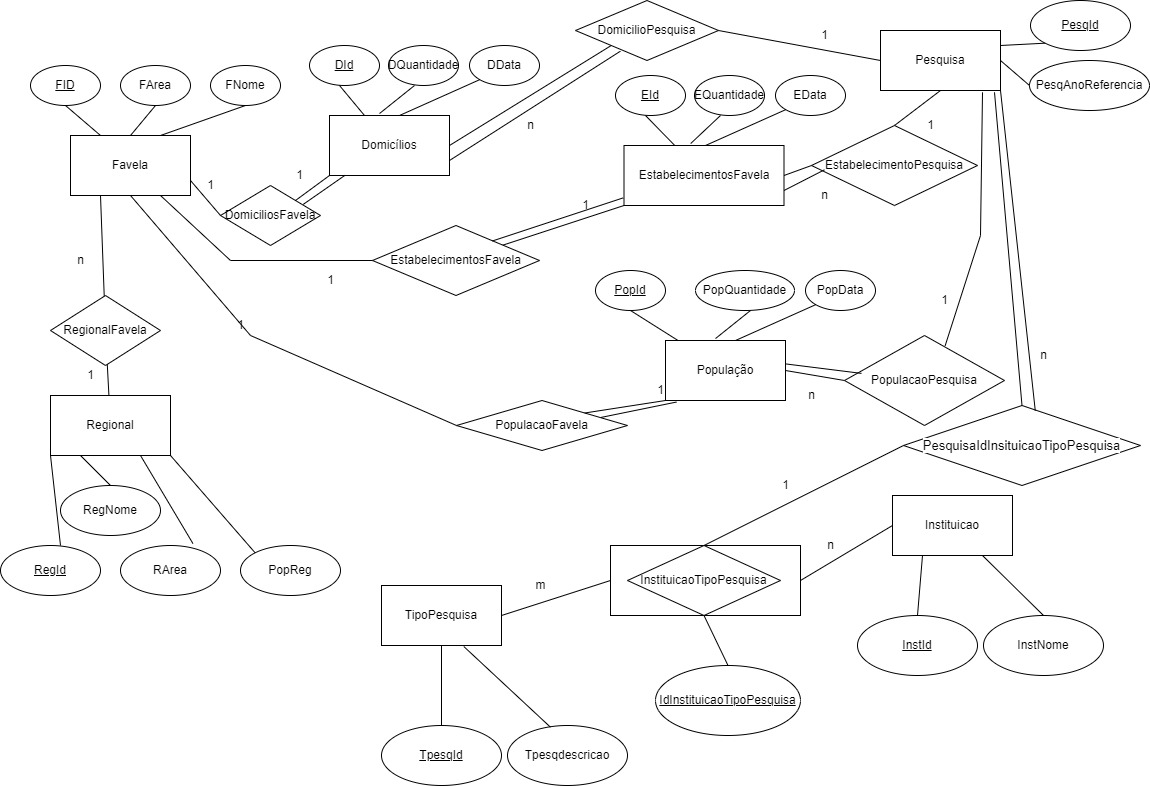

# 5. Diagrama relacional

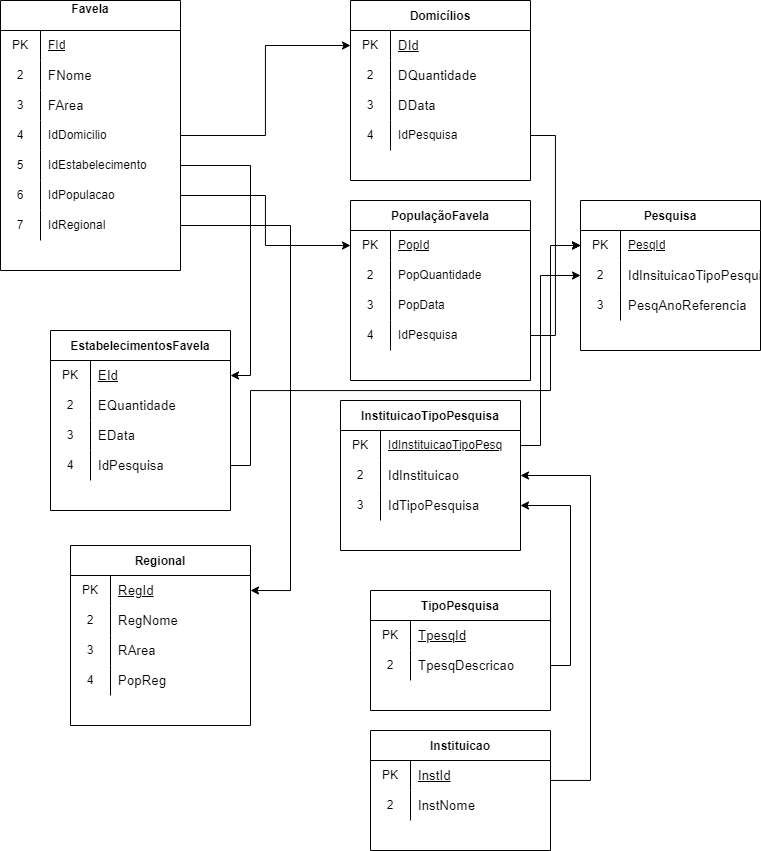

# 6. Consultas

## 6.1 Duas consultas envolvendo seleção e projeção

### 6.1.1 Consulta 1 (duas versões)


Favelas com mais que 8000 habitantes

In [ ]:
query = """
SELECT 
 F.Nome
FROM 
  Favelas as F
  INNER JOIN Populações as P ON F.IdPopulacao = P.Id
WHERE 
  P.Populacao>8000
"""
df = pd.read_sql_query(query, conn)
df

,NOME
0,Alto Vera Cruz
1,Cabana do Pai Tomás
2,Conjunto Taquaril
3,Jardim Felicidade
4,Nossa Senhora de Fátima
5,Novo Aarão Reis
6,Vila Pinho
7,Vila Santa Lúcia
8,Vila Vista Alegre


In [ ]:
%timeit pd.read_sql_query(query, conn)

The slowest run took 5.56 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 716 µs per loop


In [ ]:
query = """
SELECT 
 F.Nome
FROM 
  Favelas as F
WHERE 
  F.IdPopulacao IN (SELECT Id
                   FROM Populações as P
                   WHERE P.Populacao>8000)
"""
df = pd.read_sql_query(query, conn)
df

,NOME
0,Alto Vera Cruz
1,Cabana do Pai Tomás
2,Conjunto Taquaril
3,Jardim Felicidade
4,Nossa Senhora de Fátima
5,Novo Aarão Reis
6,Vila Pinho
7,Vila Santa Lúcia
8,Vila Vista Alegre


In [ ]:
%timeit pd.read_sql_query(query, conn)

1000 loops, best of 5: 647 µs per loop


Como *Favelas* possui apenas 218 instâncias, os tempos de execução não ficam muito discriminantes, embora haja a realização de uma subquery na versão alternativa da consulta, que a princípio poderia refinar mais a execucção.

### 6.1.2 Consulta 2 (duas versões)

Favelas Com mais de 2000 domicilios

In [ ]:
query = """
SELECT 
 F.Nome
FROM 
  Favelas as F
  INNER JOIN Domicilios as D ON F.IdDomicilios = D.Id
WHERE D.Quantidade>2000
"""
df = pd.read_sql_query(query, conn)
df

,NOME
0,Alto Vera Cruz
1,Cabana do Pai Tomás
2,Conjunto Taquaril
3,Jardim Felicidade
4,Nossa Senhora de Fátima
5,Novo Aarão Reis
6,Ventosa
7,Vila Pinho
8,Vila Santa Lúcia
9,Vila Vista Alegre


In [ ]:
%timeit pd.read_sql_query(query, conn)

1000 loops, best of 5: 709 µs per loop


In [ ]:
query = """
SELECT 
 F.Nome
FROM 
  Favelas as F
WHERE F.IdPopulacao IN(
  SELECT 
    Id
  FROM  
    Domicilios as D
  WHERE D.Quantidade>2000)
"""
df = pd.read_sql_query(query, conn)
df

,NOME
0,Alto Vera Cruz
1,Cabana do Pai Tomás
2,Conjunto Taquaril
3,Jardim Felicidade
4,Nossa Senhora de Fátima
5,Novo Aarão Reis
6,Ventosa
7,Vila Pinho
8,Vila Santa Lúcia
9,Vila Vista Alegre


In [ ]:
%timeit pd.read_sql_query(query, conn)

The slowest run took 4.65 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 644 µs per loop


Como *Favelas* possui apenas 218 instâncias, os tempos de execução não ficam muito discriminantes, embora haja a realização de uma subquery na versão alternativa da consulta, que a princípio poderia refinar mais a execucção.

## 6.2 Três consultas envolvendo junção de duas relações

### 6.2.1 Consulta 3 (duas versões)

Quantidade de domicílios em periferias por regional.


In [ ]:
query = """
SELECT 
  reg.Nome AS Regional,
  SUM(dom.Quantidade) AS QuantidadeDomicilios
FROM 
  Regionais as reg
  JOIN Favelas as fav on fav.IdRegional = reg.Id
  JOIN Domicilios as dom on dom.IdFavela = fav.Id
GROUP BY reg.Nome
ORDER BY SUM(dom.Quantidade) DESC
"""
df = pd.read_sql_query(query, conn)
df

,Regional,QuantidadeDomicilios
0,Oeste,21507
1,Centro-Sul,17808
2,Leste,14750
3,Barreiro,14707
4,Norte,13071
5,Nordeste,10079
6,Noroeste,8442
7,Venda Nova,7291
8,Pampulha,5070


In [ ]:
%timeit pd.read_sql_query(query, conn)

1000 loops, best of 5: 1.08 ms per loop


In [ ]:
query = """
SELECT 
  reg.Nome AS Regional,
  SUM(dom.Quantidade) AS QuantidadeDomicilios
FROM 
  Regionais as reg, Favelas as fav, Domicilios as dom
WHERE 
  fav.IdRegional = reg.Id
  AND dom.IdFavela = fav.Id
GROUP BY reg.Nome
ORDER BY SUM(dom.Quantidade) DESC
"""
df = pd.read_sql_query(query, conn)
df

,Regional,QuantidadeDomicilios
0,Oeste,21507
1,Centro-Sul,17808
2,Leste,14750
3,Barreiro,14707
4,Norte,13071
5,Nordeste,10079
6,Noroeste,8442
7,Venda Nova,7291
8,Pampulha,5070


In [ ]:
%timeit pd.read_sql_query(query, conn)

1000 loops, best of 5: 1.08 ms per loop


Como o número de instâncias é significativamente pequeno (*Regionais* possui 9, *Favelas* e *Domicilios* 218), não é possível ver diferença quanto ao tempo de execução entre as situações do uso dos comandos JOIN e WHERE fazendo junções.

### 6.2.2 Consulta 4 (duas versões)

População moradora de periferias por regional

In [ ]:
query = """
SELECT 
  reg.Nome AS Regional,
  SUM(pop.Populacao) AS Populacao
FROM 
  Regionais as reg
  JOIN Favelas as fav on fav.IdRegional = reg.Id
  JOIN Populações as pop on pop.IdFavela = fav.Id
GROUP BY reg.Id
ORDER BY SUM(pop.Populacao) DESC
"""
df = pd.read_sql_query(query, conn)
df

,Regional,Populacao
0,Oeste,69391
1,Centro-Sul,59736
2,Barreiro,49823
3,Leste,48724
4,Norte,43887
5,Nordeste,33229
6,Noroeste,27421
7,Venda Nova,23840
8,Pampulha,16313


In [ ]:
%timeit pd.read_sql_query(query, conn)

1000 loops, best of 5: 1.07 ms per loop


In [ ]:
query = """
SELECT 
  reg.Nome AS Regional,
  SUM(pop.Populacao) AS Populacao
FROM 
  Regionais as reg,Favelas as fav ,Populações as pop 
WHERE pop.IdFavela = fav.Id AND fav.IdRegional = reg.Id
GROUP BY reg.Nome
ORDER BY SUM(pop.Populacao) DESC
"""
df = pd.read_sql_query(query, conn)
df

,Regional,Populacao
0,Oeste,69391
1,Centro-Sul,59736
2,Barreiro,49823
3,Leste,48724
4,Norte,43887
5,Nordeste,33229
6,Noroeste,27421
7,Venda Nova,23840
8,Pampulha,16313


In [ ]:
%timeit pd.read_sql_query(query, conn)

1000 loops, best of 5: 1.08 ms per loop


Como o número de instâncias é significativamente pequeno (*Regionais* possui 9, *Favelas* e *Populações* 218), não é possível ver diferença quanto ao tempo de execução entre as situações do uso dos comandos JOIN e WHERE fazendo junções.

### 6.2.3 Consulta 5 (duas versões)

Quantidade de estabelecimnentos em periferias por regional

In [ ]:
query = """
SELECT 
  reg.Nome AS Regional,
  SUM(estab.Quantidade) AS QuantidadeEstabelecimentos
FROM 
  Regionais as reg
  JOIN Favelas as fav on fav.IdRegional = reg.Id
  JOIN Estabelecimentos as estab on estab.IdFavela = fav.Id
GROUP BY reg.Nome
ORDER BY SUM(estab.Quantidade) DESC
"""
df = pd.read_sql_query(query, conn)
df

,Regional,QuantidadeEstabelecimentos
0,Oeste,1870.0
1,Centro-Sul,1537.0
2,Leste,1327.0
3,Norte,1003.0
4,Barreiro,997.0
5,Nordeste,779.0
6,Noroeste,585.0
7,Venda Nova,432.0
8,Pampulha,347.0


In [ ]:
%timeit pd.read_sql_query(query, conn)

1000 loops, best of 5: 1.08 ms per loop


In [ ]:
query = """
SELECT 
  reg.Nome AS Regional,
  SUM(estab.Quantidade) AS QuantidadeEstabelecimentos
FROM 
  Regionais as reg, Favelas as fav, Estabelecimentos as estab
WHERE
  fav.IdRegional = reg.Id
  AND estab.IdFavela = fav.Id
GROUP BY fav.IdRegional
ORDER BY SUM(estab.Quantidade) DESC
"""
df = pd.read_sql_query(query, conn)
df

,Regional,QuantidadeEstabelecimentos
0,Oeste,1870.0
1,Centro-Sul,1537.0
2,Leste,1327.0
3,Norte,1003.0
4,Barreiro,997.0
5,Nordeste,779.0
6,Noroeste,585.0
7,Venda Nova,432.0
8,Pampulha,347.0


In [ ]:
%timeit pd.read_sql_query(query, conn)

1000 loops, best of 5: 1.07 ms per loop


Como o número de instâncias é significativamente pequeno (*Regionais* possui 9, *Favelas* 218 e *Estabelecimentos* 210), não é possível ver diferença quanto ao tempo de execução entre as situações do uso dos comandos JOIN e WHERE realizando junções.

## 6.3 Três consultas envolvendo junção de três ou mais relações

### 6.3.1 Consulta 6 (duas versões)

Top 10 favelas com maior média de moradores por domicilio

In [ ]:
query = """
SELECT 
  fav.Nome AS Nome,
  pop.Populacao AS Populacao,
  dom.Quantidade AS Domicilios,
  CAST(pop.Populacao AS float) / CAST(dom.Quantidade AS float) AS Densidade,
  reg.Nome as Regional
FROM
  Favelas as fav
  INNER JOIN Domicilios as dom on dom.IdFavela = fav.Id
  INNER JOIN Populações as pop on pop.IdFavela = fav.Id
  INNER JOIN Regionais as reg on reg.Id = fav.IdRegional
ORDER BY CAST(pop.Populacao AS float) / CAST(dom.Quantidade AS float) DESC
LIMIT 10
"""
df = pd.read_sql_query(query, conn)
df

,Nome,Populacao,Domicilios,Densidade,Regional
0,Vila Aeroporto,352,68,5.176471,Pampulha
1,São Francisco das Chagas,1260,269,4.684015,Noroeste
2,Barão Homem de Melo I,207,48,4.312500,Oeste
3,Mirtes,346,86,4.023256,Nordeste
4,Vila Suzana II,60,15,4.000000,Pampulha
5,Conjunto Floramar,916,237,3.864979,Norte
6,Vila dos Anjos,808,215,3.758140,Venda Nova
7,Vila da Área,337,90,3.744444,Leste
8,Cristo Rei,186,50,3.720000,Oeste
9,Vila Piratininga A,342,92,3.717391,Venda Nova


In [ ]:
%timeit pd.read_sql_query(query, conn)

The slowest run took 4.39 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 1.53 ms per loop


In [ ]:
query = """
SELECT 
  fav.Nome AS Nome,
  pop.Populacao AS Populacao,
  dom.Quantidade AS Domicilios,
  CAST(pop.Populacao AS float) / CAST(dom.Quantidade AS float) AS Densidade,
  reg.Nome as Regional
FROM
  Favelas as fav, 
  Domicilios as dom, 
  Populações as pop, 
  Regionais as reg
WHERE dom.IdFavela = fav.Id
  AND pop.IdFavela = fav.Id
  AND reg.Id = fav.IdRegional
ORDER BY CAST(pop.Populacao AS float) / CAST(dom.Quantidade AS float) DESC
LIMIT 10
"""
df = pd.read_sql_query(query, conn)
df

,Nome,Populacao,Domicilios,Densidade,Regional
0,Vila Aeroporto,352,68,5.176471,Pampulha
1,São Francisco das Chagas,1260,269,4.684015,Noroeste
2,Barão Homem de Melo I,207,48,4.312500,Oeste
3,Mirtes,346,86,4.023256,Nordeste
4,Vila Suzana II,60,15,4.000000,Pampulha
5,Conjunto Floramar,916,237,3.864979,Norte
6,Vila dos Anjos,808,215,3.758140,Venda Nova
7,Vila da Área,337,90,3.744444,Leste
8,Cristo Rei,186,50,3.720000,Oeste
9,Vila Piratininga A,342,92,3.717391,Venda Nova


In [ ]:
%timeit pd.read_sql_query(query, conn)

1000 loops, best of 5: 1.51 ms per loop


Como o número de instâncias não é muito expressivo (*Favelas*, *Domicilios* e *Populações* possuem 218 e *Regionais* 9), não é possível ver diferença quanto ao tempo de execução entre as situações do uso dos comandos INNER JOIN e WHERE realizando junções.

### 6.3.2 Consulta 7 (duas versões)

Maior quantidade de estabelecimentos por morador de periferia

In [ ]:
query = """
SELECT 
  fav.Nome AS Favela,
  estab.Quantidade AS NumeroEstabelecimentos,
  pop.Populacao AS Populacao,
  CAST(pop.Populacao AS float) / CAST(estab.Quantidade AS float) AS Densidade,
  reg.Nome AS Regional
FROM
  Favelas as fav
  INNER JOIN Estabelecimentos as estab on estab.IdFavela = fav.Id
  INNER JOIN Populações as pop on pop.IdFavela = fav.Id
  INNER JOIN Regionais as reg on reg.Id = fav.IdRegional
ORDER BY CAST(pop.Populacao AS float) / CAST(estab.Quantidade AS float) DESC
LIMIT 10
"""
df = pd.read_sql_query(query, conn)
df

,Favela,NumeroEstabelecimentos,Populacao,Densidade,Regional
0,Chácara Leonina,1.0,434,434.000000,Oeste
1,Vila Minaslândia,2.0,853,426.500000,Norte
2,Alta Tensão,1.0,397,397.000000,Barreiro
3,Boa União II,1.0,311,311.000000,Norte
4,Castanheira,8.0,2395,299.375000,Barreiro
5,Vila Paraíso,1.0,296,296.000000,Leste
6,Vila Nossa Senhora do Rosário,3.0,673,224.333333,Leste
7,Universo,10.0,1882,188.200000,Venda Nova
8,Grota,1.0,182,182.000000,Leste
9,Jardim do Vale,6.0,1091,181.833333,Barreiro


In [ ]:
%timeit pd.read_sql_query(query, conn)

1000 loops, best of 5: 1.65 ms per loop


In [ ]:
query = """
SELECT 
  fav.Nome AS Favela,
  estab.Quantidade AS NumeroEstabelecimentos,
  pop.Populacao AS Populacao,
  CAST(pop.Populacao AS FLOAT) / CAST(estab.Quantidade AS FLOAT) AS Densidade,
  reg.Nome AS Regional
FROM
  Favelas as fav
  LEFT JOIN Estabelecimentos as estab on estab.IdFavela = fav.Id
  LEFT JOIN Populações as pop on pop.IdFavela = fav.Id
  LEFT JOIN Regionais as reg on reg.Id = fav.IdRegional
ORDER BY CAST(pop.Populacao AS FLOAT) / CAST(estab.Quantidade AS FLOAT) DESC
LIMIT 10
"""
df = pd.read_sql_query(query, conn)
df

,Favela,NumeroEstabelecimentos,Populacao,Densidade,Regional
0,Chácara Leonina,1.0,434,434.000000,Oeste
1,Vila Minaslândia,2.0,853,426.500000,Norte
2,Alta Tensão,1.0,397,397.000000,Barreiro
3,Boa União II,1.0,311,311.000000,Norte
4,Castanheira,8.0,2395,299.375000,Barreiro
5,Vila Paraíso,1.0,296,296.000000,Leste
6,Vila Nossa Senhora do Rosário,3.0,673,224.333333,Leste
7,Universo,10.0,1882,188.200000,Venda Nova
8,Grota,1.0,182,182.000000,Leste
9,Jardim do Vale,6.0,1091,181.833333,Barreiro


In [ ]:
%timeit pd.read_sql_query(query, conn)

1000 loops, best of 5: 1.7 ms per loop


Como o número de instâncias não é muito expressivo (*Favelas* e *Populações* possuem 218, *Estabelecimentos* 210 e *Regionais* 9), não é possível ver diferença signficativa quanto ao tempo de execução entre as situações do uso dos comandos INNER JOIN e LEFT JOIN.

### 6.3.3 Consulta 8 (duas versões)

Maior densidade de estabelecimentos por pessoa em favelas por regional

In [ ]:
query = """
SELECT 
  reg.Nome AS Regional,
  SUM(dom.Quantidade) AS Domicilios,
  SUM(pop.Populacao) AS Populacao,
  CAST(SUM(dom.Quantidade) AS float) / CAST(SUM(pop.Populacao) AS float) AS Densidade
FROM 
  Regionais as reg
  INNER JOIN Favelas as fav on fav.IdRegional = reg.Id
  INNER JOIN Domicilios as dom on dom.IdFavela = fav.Id
  INNER JOIN Populações as pop on pop.IdFavela = fav.Id
GROUP BY reg.Nome
ORDER BY CAST(SUM(dom.Quantidade) AS float) / CAST(SUM(pop.Populacao) AS float) DESC
"""
df = pd.read_sql_query(query, conn)
df

,Regional,Domicilios,Populacao,Densidade
0,Pampulha,5070,16313,0.310795
1,Oeste,21507,69391,0.309939
2,Noroeste,8442,27421,0.307866
3,Venda Nova,7291,23840,0.305831
4,Nordeste,10079,33229,0.303319
5,Leste,14750,48724,0.302726
6,Centro-Sul,17808,59736,0.298112
7,Norte,13071,43887,0.297833
8,Barreiro,14707,49823,0.295185


In [ ]:
%timeit pd.read_sql_query(query, conn)

1000 loops, best of 5: 1.45 ms per loop


In [ ]:
query = """
SELECT 
  reg.Nome AS Regional,
  SUM(dom.Quantidade) AS Domicilios,
  SUM(pop.Populacao) AS Populacao,
  CAST(SUM(dom.Quantidade) AS float) / CAST(SUM(pop.Populacao) AS float) AS Densidade
FROM 
  Regionais as reg, 
  Favelas as fav, 
  Domicilios as dom, 
  Populações as pop
WHERE fav.IdRegional = reg.Id
  AND dom.IdFavela = fav.Id
  AND pop.IdFavela = fav.Id
GROUP BY fav.IdRegional
ORDER BY CAST(SUM(dom.Quantidade) AS float) / CAST(SUM(pop.Populacao) AS float) DESC
"""
df = pd.read_sql_query(query, conn)
df

,Regional,Domicilios,Populacao,Densidade
0,Pampulha,5070,16313,0.310795
1,Oeste,21507,69391,0.309939
2,Noroeste,8442,27421,0.307866
3,Venda Nova,7291,23840,0.305831
4,Nordeste,10079,33229,0.303319
5,Leste,14750,48724,0.302726
6,Centro-Sul,17808,59736,0.298112
7,Norte,13071,43887,0.297833
8,Barreiro,14707,49823,0.295185


In [ ]:
%timeit pd.read_sql_query(query, conn)

1000 loops, best of 5: 1.44 ms per loop


Como o número de instâncias não é muito expressivo (*Favelas*, *Domicilios* e *Populações* possuem 218 e *Regionais* 9), não é possível ver diferença signficativa quanto ao tempo de execução entre as situações do uso dos comandos INNER JOIN e WHERE realizando junções.

## 6.4 Duas consultas envolvendo agregação sobre junção de duas ou mais relações

### 6.4.1 Consulta 9 (duas versões)

Porcentagem da população de cada regional que mora em periferias

In [ ]:
query = """
SELECT 
  reg.Nome AS Regional,
  CAST(SUM(pop.Populacao) AS float) / CAST(reg.Populacao AS float) * 100 AS Porcentagem
FROM 
  Regionais as reg
  JOIN Favelas as fav on fav.IdRegional = reg.Id
  JOIN Populações as pop on pop.IdFavela = fav.Id
GROUP BY reg.Id
ORDER BY SUM(pop.Populacao) DESC
"""
df = pd.read_sql_query(query, conn)
df

,Regional,Porcentagem
0,Oeste,24.252581
1,Centro-Sul,21.938777
2,Barreiro,17.633214
3,Leste,19.546441
4,Norte,20.608773
5,Nordeste,11.414586
6,Noroeste,8.275240
7,Venda Nova,9.092886
8,Pampulha,8.708859


In [ ]:
%timeit pd.read_sql_query(query, conn)

1000 loops, best of 5: 1.09 ms per loop


In [ ]:
query = """
SELECT 
  reg.Nome AS Regional,
   CAST(SUM(pop.Populacao) * 100 AS float) / CAST(reg.Populacao AS float) AS Porcentagem
FROM 
  Regionais as reg
  INNER JOIN Favelas as fav on fav.IdRegional = reg.Id
  INNER JOIN Populações as pop on pop.IdFavela = fav.Id
GROUP BY fav.IdRegional
ORDER BY SUM(pop.Populacao) DESC
"""
df = pd.read_sql_query(query, conn)
df

,Regional,Porcentagem
0,Oeste,24.252581
1,Centro-Sul,21.938777
2,Barreiro,17.633214
3,Leste,19.546441
4,Norte,20.608773
5,Nordeste,11.414586
6,Noroeste,8.275240
7,Venda Nova,9.092886
8,Pampulha,8.708859


In [ ]:
%timeit pd.read_sql_query(query, conn)

1000 loops, best of 5: 1.07 ms per loop


Como o número de instâncias não é muito expressivo (*Favelas* e *Populações* possuem 218 e *Regionais* 9), não é possível ver diferença signficativa quanto ao tempo de execução entre as situações do uso dos comandos INNER JOIN e JOIN.

### 6.4.2 Consulta 10 (duas versões)

Maior densidade de estabelecimentos por domicilios em favelas por regional

In [ ]:
query = """
SELECT 
  reg.Nome AS Regional,
  SUM(dom.Quantidade) AS Domicilios,
  SUM(estab.Quantidade) AS Estabelecimentos,
  CAST(SUM(dom.Quantidade) AS float) / CAST(SUM(estab.Quantidade) AS float) AS Densidade
FROM 
  Regionais as reg
  INNER JOIN Favelas as fav on fav.IdRegional = reg.Id
  INNER JOIN Domicilios as dom on dom.IdFavela = fav.Id
  INNER JOIN Estabelecimentos as estab on estab.IdFavela = fav.Id
GROUP BY reg.Nome
ORDER BY CAST(SUM(dom.Quantidade) AS float) / CAST(SUM(estab.Quantidade) AS float) DESC
"""
df = pd.read_sql_query(query, conn)
df

,Regional,Domicilios,Estabelecimentos,Densidade
0,Venda Nova,7131,432.0,16.506944
1,Barreiro,14707,997.0,14.751254
2,Noroeste,8442,585.0,14.430769
3,Pampulha,4899,347.0,14.118156
4,Nordeste,9997,779.0,12.833119
5,Norte,12614,1003.0,12.576271
6,Oeste,21024,1870.0,11.242781
7,Centro-Sul,17250,1537.0,11.223162
8,Leste,14650,1327.0,11.039940


In [ ]:
%timeit pd.read_sql_query(query, conn)

1000 loops, best of 5: 1.47 ms per loop


In [ ]:
query = """
SELECT 
  reg.Nome AS Regional,
  SUM(dom.Quantidade) AS Domicilios,
  SUM(estab.Quantidade) AS Estabelecimentos,
  CAST(SUM(dom.Quantidade) AS float) / CAST(SUM(estab.Quantidade) AS float) AS Densidade
FROM 
  Regionais as reg,
  Favelas as fav,
  Domicilios as dom,
  Estabelecimentos as estab
WHERE fav.IdRegional = reg.Id
  AND dom.IdFavela = fav.Id
  AND estab.IdFavela = fav.Id
GROUP BY fav.IdRegional
ORDER BY CAST(SUM(dom.Quantidade) AS float) / CAST(SUM(estab.Quantidade) AS float) DESC
"""
df = pd.read_sql_query(query, conn)
df

,Regional,Domicilios,Estabelecimentos,Densidade
0,Venda Nova,7131,432.0,16.506944
1,Barreiro,14707,997.0,14.751254
2,Noroeste,8442,585.0,14.430769
3,Pampulha,4899,347.0,14.118156
4,Nordeste,9997,779.0,12.833119
5,Norte,12614,1003.0,12.576271
6,Oeste,21024,1870.0,11.242781
7,Centro-Sul,17250,1537.0,11.223162
8,Leste,14650,1327.0,11.039940


In [ ]:
%timeit pd.read_sql_query(query, conn)

1000 loops, best of 5: 1.5 ms per loop


Como o número de instâncias não é muito expressivo (*Favelas* e *Domicilios* possuem 218, *Estabelecimentos* 210 e *Regionais* 9), não é possível ver diferença signficativa quanto ao tempo de execução entre as situações do uso dos comandos INNER JOIN e WHERE realizando junções.

# 7. Autoavaliação dos membros

1. Fernando Vilela Brandao: Ajudei no tratamento e normalização dos dados, representei o Modelo relacional, construí o Modelo ER e realizei as Consultas 6.1.1 e 6.1.2
2. Gabriel de Paula Silva: Ajudei no tratamento dos dados, adição de informação das regionais, na construção do Modelo relacional normalizado, e realizei as Consultas 6.2.3, 6.3.1, 6.3.2, 6.3.3, 6.4.1 e 6.4.2.
3. Juliana Espíndola Botelho: Ajudei na construção do Modelo relacional normalizado, escrevi o relatório da primeira entrega, analisei o tempo de execução das querys, escrevi a seção 3 do Collab, editei o vídeo a ser submetido e realizei as Consultas 6.2.1 e 6.2.2.